# 📉📊📈**Comparing the Performance of Various Machine Learning Models for Stock Price Prediction**📉📊📈


Stock price forecasting is a challenging topic compared to other price forecasting cases. Scholars and experts from various fields have studied stock market price forecasts, noting that stocks exhibit random walking behavior with sudden rises and falls. Accurate stock market forecasting can greatly benefit managers, investors, and decision-makers in making informed investment choices. Machine learning techniques, utilizing historical data to identify patterns and predictive models, are commonly employed for stock price prediction.

# ✅ **Linear Regression** ✅

Linear regression is a statistical method that models the relationship between two variables using a linear equation. One variable is considered explanatory (X), and the other is dependent (Y). For example, it can be used to study how height (X) affects weight (Y) by estimating the best-fitting line through observed data. Linear regression is a common technique in data analysis, machine learning, and statistical modeling, providing insights into the direction and strength of the relationship between variables.

# **Import Libraries**

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load Dataset into the Data Frame**

In [3]:
# input
symbol = 'TSLA'
start = '2010-01-01'
end = '2021-12-31'

dataset = pd.read_csv('../dataset/TSLA.csv')
dataset.sample(5)
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


# **Dataset Preprocessing**

In [4]:
dataset['Open_Close'] = (dataset['Open'] - dataset['Adj Close'])/dataset['Open']
dataset['High_Low'] = (dataset['High'] - dataset['Low'])/dataset['Low']
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.075998,0.305580,0,0,0,-0.002511
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.121600,0.278737,0,0,0,-0.078473
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.165217,0.234634,1,0,0,-0.125683
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.194500,0.263424,1,0,0,-0.160937
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,0.036585,0.110147,1,0,1,-0.019243


# **View Dataset**

In [5]:
# view dataset
dataset

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
Date,,,,,,,,,,,,
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.075998,0.305580,0,0,0,-0.002511
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.121600,0.278737,0,0,0,-0.078473
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.165217,0.234634,1,0,0,-0.125683
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.194500,0.263424,1,0,0,-0.160937
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,0.036585,0.110147,1,0,1,-0.019243
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,335.600006,357.660004,332.519989,355.666656,355.666656,92713200,-0.059793,0.075605,0,1,1,0.057619
2021-12-27,357.890015,372.333344,356.906677,364.646667,364.646667,71145900,-0.018879,0.043223,0,1,0,0.025248
2021-12-28,369.829987,373.000000,359.473328,362.823334,362.823334,60324000,0.018946,0.037629,0,0,0,-0.005000


# **Dataset Cleaning and Null Value Testing**

In [6]:
# view how many null values in each column
dataset.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Open_Close           0
High_Low             0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

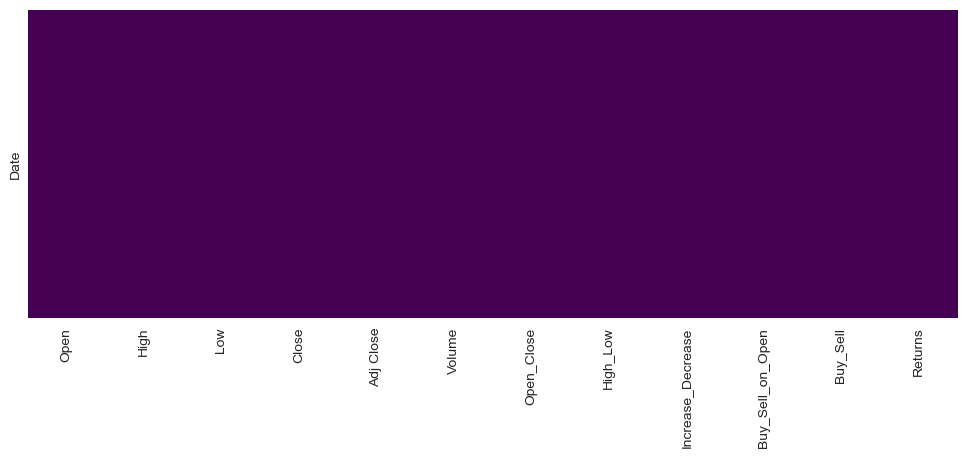

In [7]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Dataset**

In [8]:
# view number of rows, number of columns
dataset.shape

(2897, 12)

In [9]:
# total number of records
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  34764


In [10]:
# view columns names
dataset.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Open_Close',
       'High_Low', 'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell',
       'Returns'],
      dtype='object')

In [11]:
# view data types of the columns
dataset.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Adj Close            float64
Volume                 int64
Open_Close           float64
High_Low             float64
Increase_Decrease      int32
Buy_Sell_on_Open       int32
Buy_Sell               int32
Returns              float64
dtype: object

In [12]:
# view dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2897 entries, 2010-06-30 to 2021-12-30
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2897 non-null   float64
 1   High               2897 non-null   float64
 2   Low                2897 non-null   float64
 3   Close              2897 non-null   float64
 4   Adj Close          2897 non-null   float64
 5   Volume             2897 non-null   int64  
 6   Open_Close         2897 non-null   float64
 7   High_Low           2897 non-null   float64
 8   Increase_Decrease  2897 non-null   int32  
 9   Buy_Sell_on_Open   2897 non-null   int32  
 10  Buy_Sell           2897 non-null   int32  
 11  Returns            2897 non-null   float64
dtypes: float64(8), int32(3), int64(1)
memory usage: 260.3 KB


In [13]:
# view the statistics per each column
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Open_Close,High_Low,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2.897000e+03,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000,2897.000000
mean,40.991990,41.864614,40.070170,41.026370,41.026370,9.412698e+07,-0.000340,0.042158,0.468416,0.522610,0.518467,0.002492
std,75.216736,76.864317,73.460727,75.298005,75.298005,8.464854e+07,0.028581,0.026901,0.499088,0.499575,0.499745,0.035398
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06,-0.199346,0.008483,0.000000,0.000000,0.000000,-0.210628
25%,5.758000,6.064000,5.536667,5.839333,5.839333,3.852750e+07,-0.015354,0.025522,0.000000,0.000000,0.000000,-0.014816
50%,15.381333,15.652000,15.140667,15.374000,15.374000,7.448250e+07,0.000112,0.035424,0.000000,1.000000,1.000000,0.001261
75%,22.210667,22.653999,21.816668,22.257999,22.257999,1.199796e+08,0.014684,0.050233,1.000000,1.000000,1.000000,0.019175
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08,0.197535,0.305580,1.000000,1.000000,1.000000,0.243951


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Open_Close'}>,
        <AxesSubplot:title={'center':'High_Low'}>,
        <AxesSubplot:title={'center':'Increase_Decrease'}>],
       [<AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>,
        <AxesSubplot:title={'center':'Returns'}>]], dtype=object)

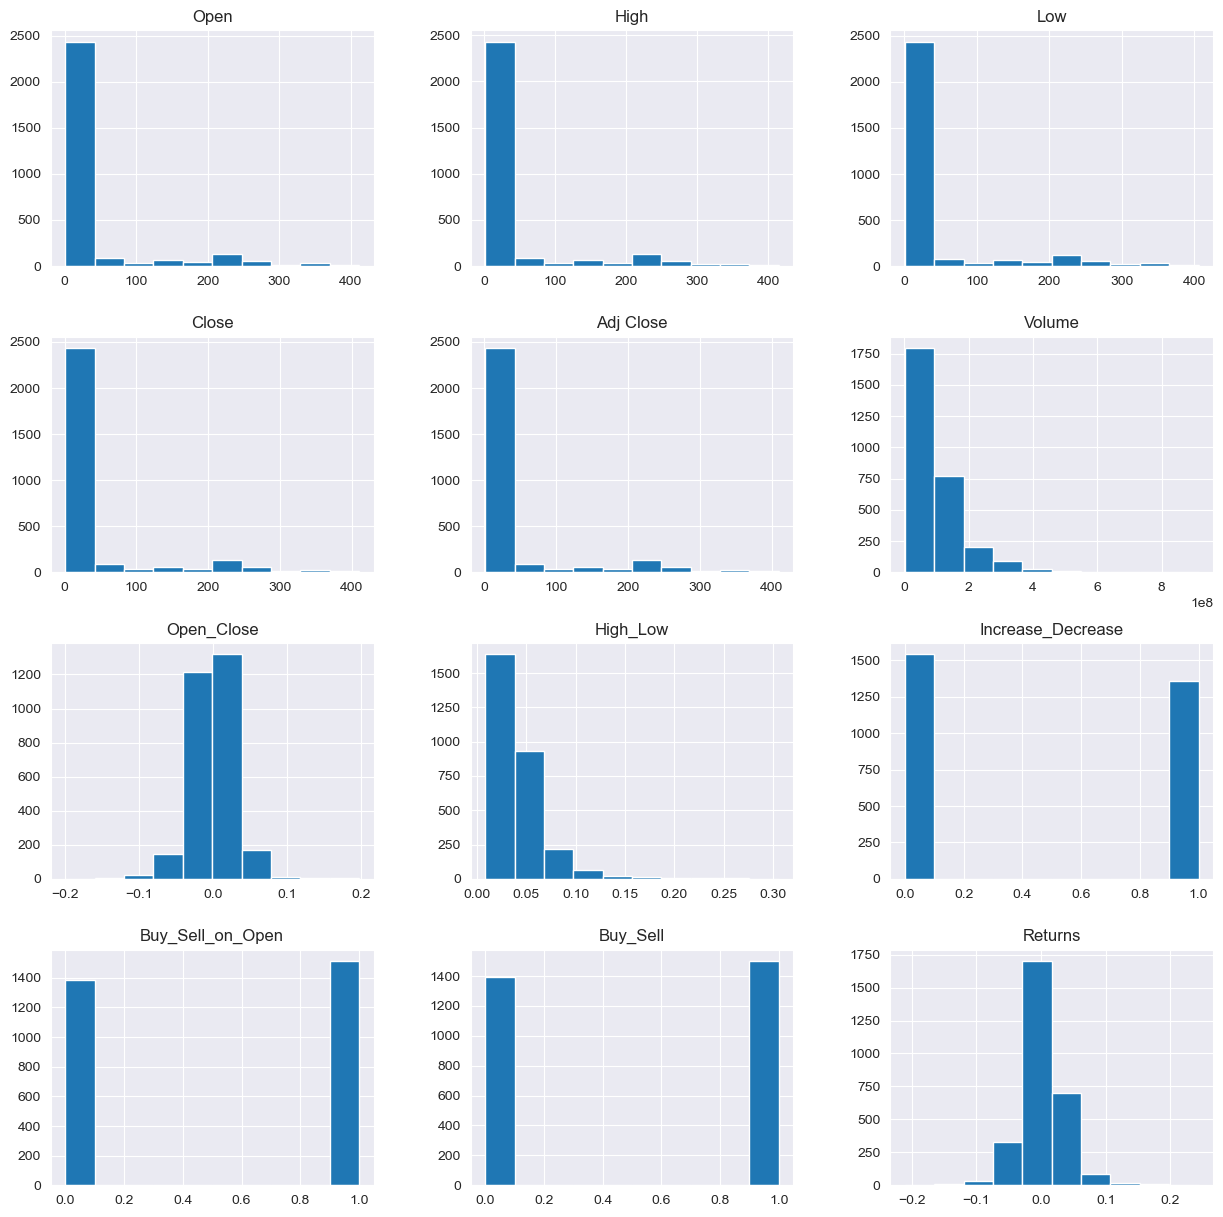

In [14]:
# view the histogram per each numerical column
dataset.hist(figsize=(15, 15))

<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

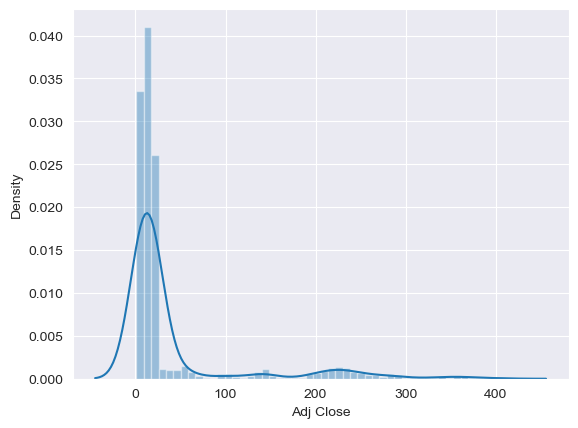

In [15]:
sns.distplot(dataset['Adj Close'])

<AxesSubplot:>

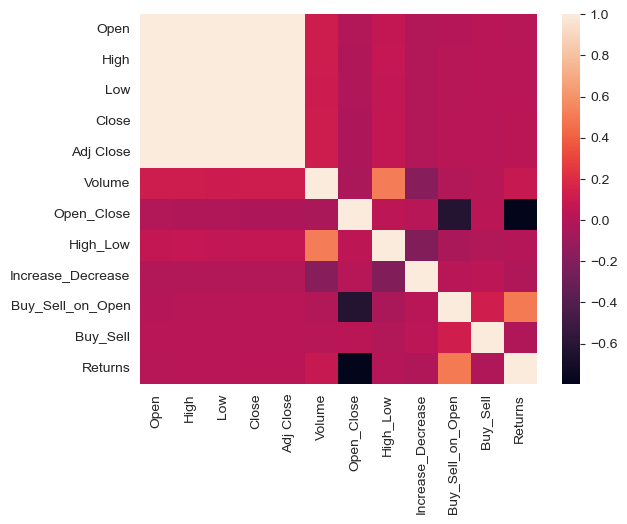

In [16]:
sns.heatmap(dataset.corr())

# **Define X and Y**

In [17]:
X = dataset[['Open', 'High', 'Low','Volume', 'Open_Close', 'High_Low', 'Returns']]
y = dataset['Adj Close']

# **Split Train Dataset and Test Dataset**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.4, random_state=101)

# **Dataset Traning and Model Traning**

In [19]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
print(lm.intercept_)

-0.014937562604544041


In [21]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns={'Coefficient'})
coeff_df

,Coefficient
Open,-4.054400e-01
High,8.520720e-01
Low,5.493761e-01
Volume,-4.047311e-10
Open_Close,-6.463344e+00
High_Low,7.547369e-01
Returns,5.413568e+00


# **Comparison of Actual Values and Predicted Values**

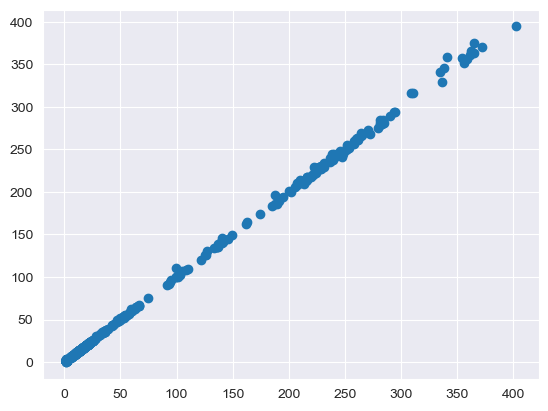

In [22]:
y_pred = lm.predict(X_test)
plt.scatter(y_test,y_pred)
plt.savefig("Figure: Comparison of Actual Values and Predictions Values")

In [23]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
print(df.head())
print(df.tail())

               Actual  Predicted
Date                            
2020-06-15  66.059998  66.007146
2011-12-01   2.173333   2.230766
2011-01-28   1.600667   1.201573
2013-05-24   6.472000   6.933256
2018-10-16  18.439333  18.769613
                Actual   Predicted
Date                              
2018-11-20   23.166000   22.839545
2016-09-02   13.185333   13.009461
2011-04-13    1.662000    1.703270
2017-12-18   22.591333   22.524484
2021-07-19  215.406662  212.641806


<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

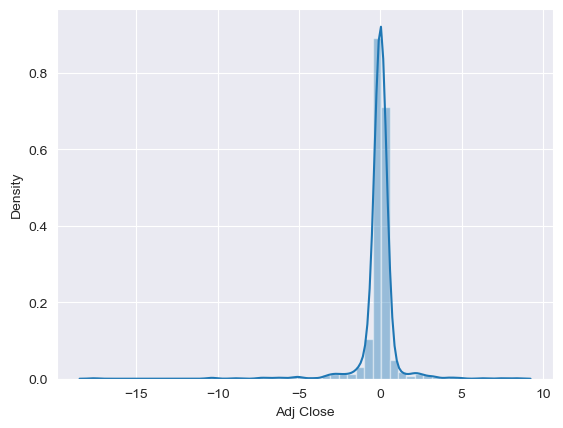

In [24]:
sns.distplot((y_test-y_pred),bins=50)

In [25]:
print(y_test.shape)
print(y_pred.shape)

(1159,)
(1159,)


In [26]:
lm_fit = lm.fit(X_train, y_train)
lm_scores = cross_val_score(lm_fit, X_train, y_train, cv = 5)

print("Mean cross validation score: {}".format(np.mean(lm_scores)))
print("Score without cv: {}".format(lm_fit.score(X_train, y_train)))

Mean cross validation score: 0.9997847306078302
Score without cv: 0.9997998159375936


# **Accuracy and Loss Function Values of the Model**

In [27]:
print('Mean_Absolute_Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root_Mean_Squared_Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean_Absolute_Error(MAE): 0.46694792320338196
Mean_Squared_Error(MSE): 1.4565580836819463
Root_Mean_Squared_Error(RMSE): 1.2068794818381603


In [28]:
print("Accuracy score: {:.7f}".format(lm.score(X_test, y_test)))

Accuracy score: 0.9997201


In [29]:
print(dataset)


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-06-30    1.719333    2.028000    1.553333    1.588667    1.588667   
2010-07-01    1.666667    1.728000    1.351333    1.464000    1.464000   
2010-07-02    1.533333    1.540000    1.247333    1.280000    1.280000   
2010-07-06    1.333333    1.333333    1.055333    1.074000    1.074000   
2010-07-07    1.093333    1.108667    0.998667    1.053333    1.053333   
...                ...         ...         ...         ...         ...   
2021-12-23  335.600006  357.660004  332.519989  355.666656  355.666656   
2021-12-27  357.890015  372.333344  356.906677  364.646667  364.646667   
2021-12-28  369.829987  373.000000  359.473328  362.823334  362.823334   
2021-12-29  366.213318  368.000000  354.713318  362.063324  362.063324   
2021-12-30  353.776672  365.183319  351.049988  356.779999  356.779999   

               Volume  Open_Close  Hi